# Análisis de los datos reducidos

## Importaciones

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pylab as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [4]:
train = pd.read_csv('./data/train_umap.csv')
train.head()

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,6.758425,6.107760,5.583170,4.176225,5.025713,4.377642,5.048572,5.622564,4.814914,...,5.245275,4.276136,5.034873,5.070408,4.891534,5.258639,5.106243,5.020439,4.947837,5.160820
1,0,3.464307,4.591202,4.900424,5.123462,5.319878,4.732382,5.600980,5.952633,4.751034,...,5.270143,4.247860,5.039081,5.035914,4.931864,5.239359,5.106047,5.031158,4.939382,5.154362
2,0,7.130909,4.521430,5.154292,3.877377,5.322951,4.546459,4.810669,5.543257,4.693491,...,5.151262,4.291214,5.053493,5.124120,4.922390,5.295325,5.166308,4.941233,4.967573,5.133875
3,0,4.479191,4.374175,4.497788,4.459588,5.060301,4.576648,4.936561,5.622583,4.671111,...,5.158844,4.279381,5.046312,5.097704,4.962239,5.285526,5.162598,4.930491,4.956057,5.118482
4,0,3.396482,4.455330,5.417948,4.134214,4.988406,4.793623,5.395314,5.915441,4.633820,...,5.171591,4.303300,5.071706,5.093084,4.927096,5.282058,5.194416,4.937039,4.954645,5.133246


## Exploración

Ahora se va a comprobar si hay o no correlaciones entre las 30 columnas

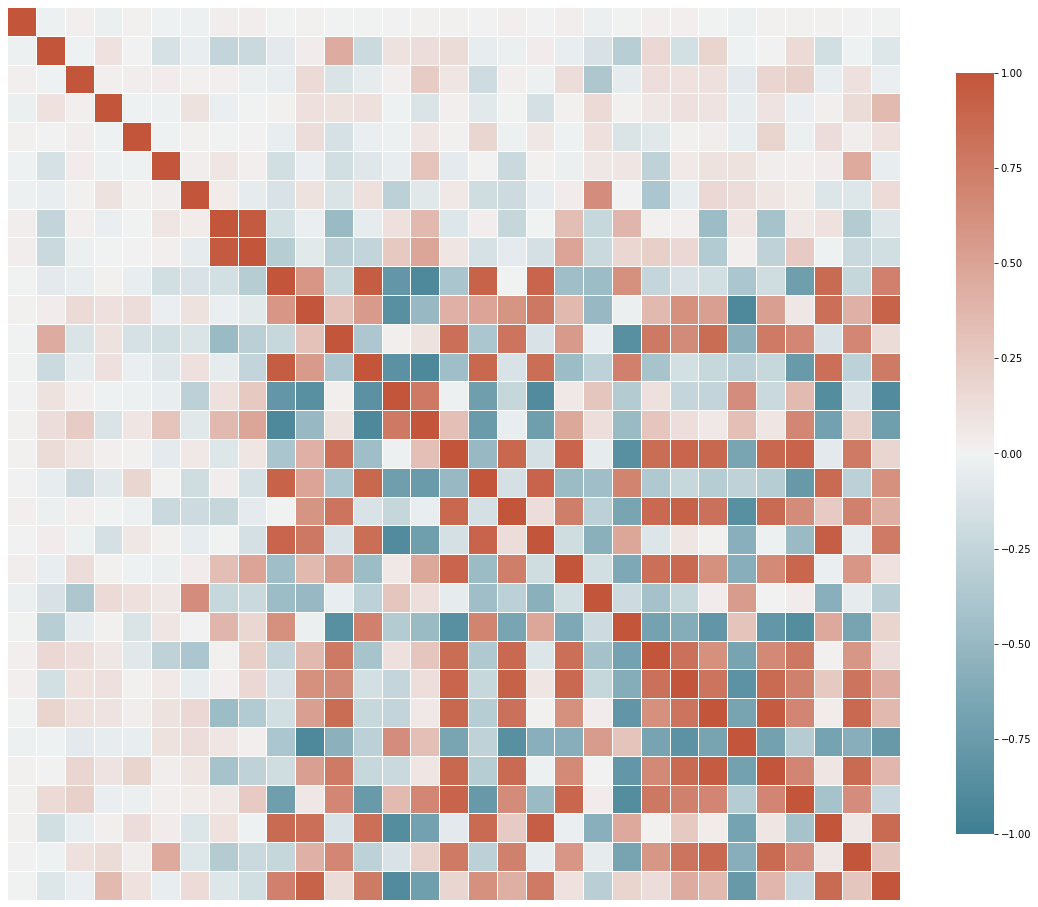

In [6]:
plt.figure(figsize=(20,20)) 

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(train.corr(),  
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=False,
            cbar_kws={"shrink": .7
                     },# barra lateral
            xticklabels=False,
            yticklabels=False
);

Se va a examinar con un random forest classifier, la importancia  relativa de las diferentes columnas para la columna 'price'

In [8]:
forest = RandomForestClassifier(random_state=0)
forest.fit(train.drop(columns=['target']), train.target)
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=train.drop(columns=['target']).columns)

In [12]:
round(importances.min(),4), round(importances.max(),4), importances.sum()

(0.0291, 0.041, 1.0)

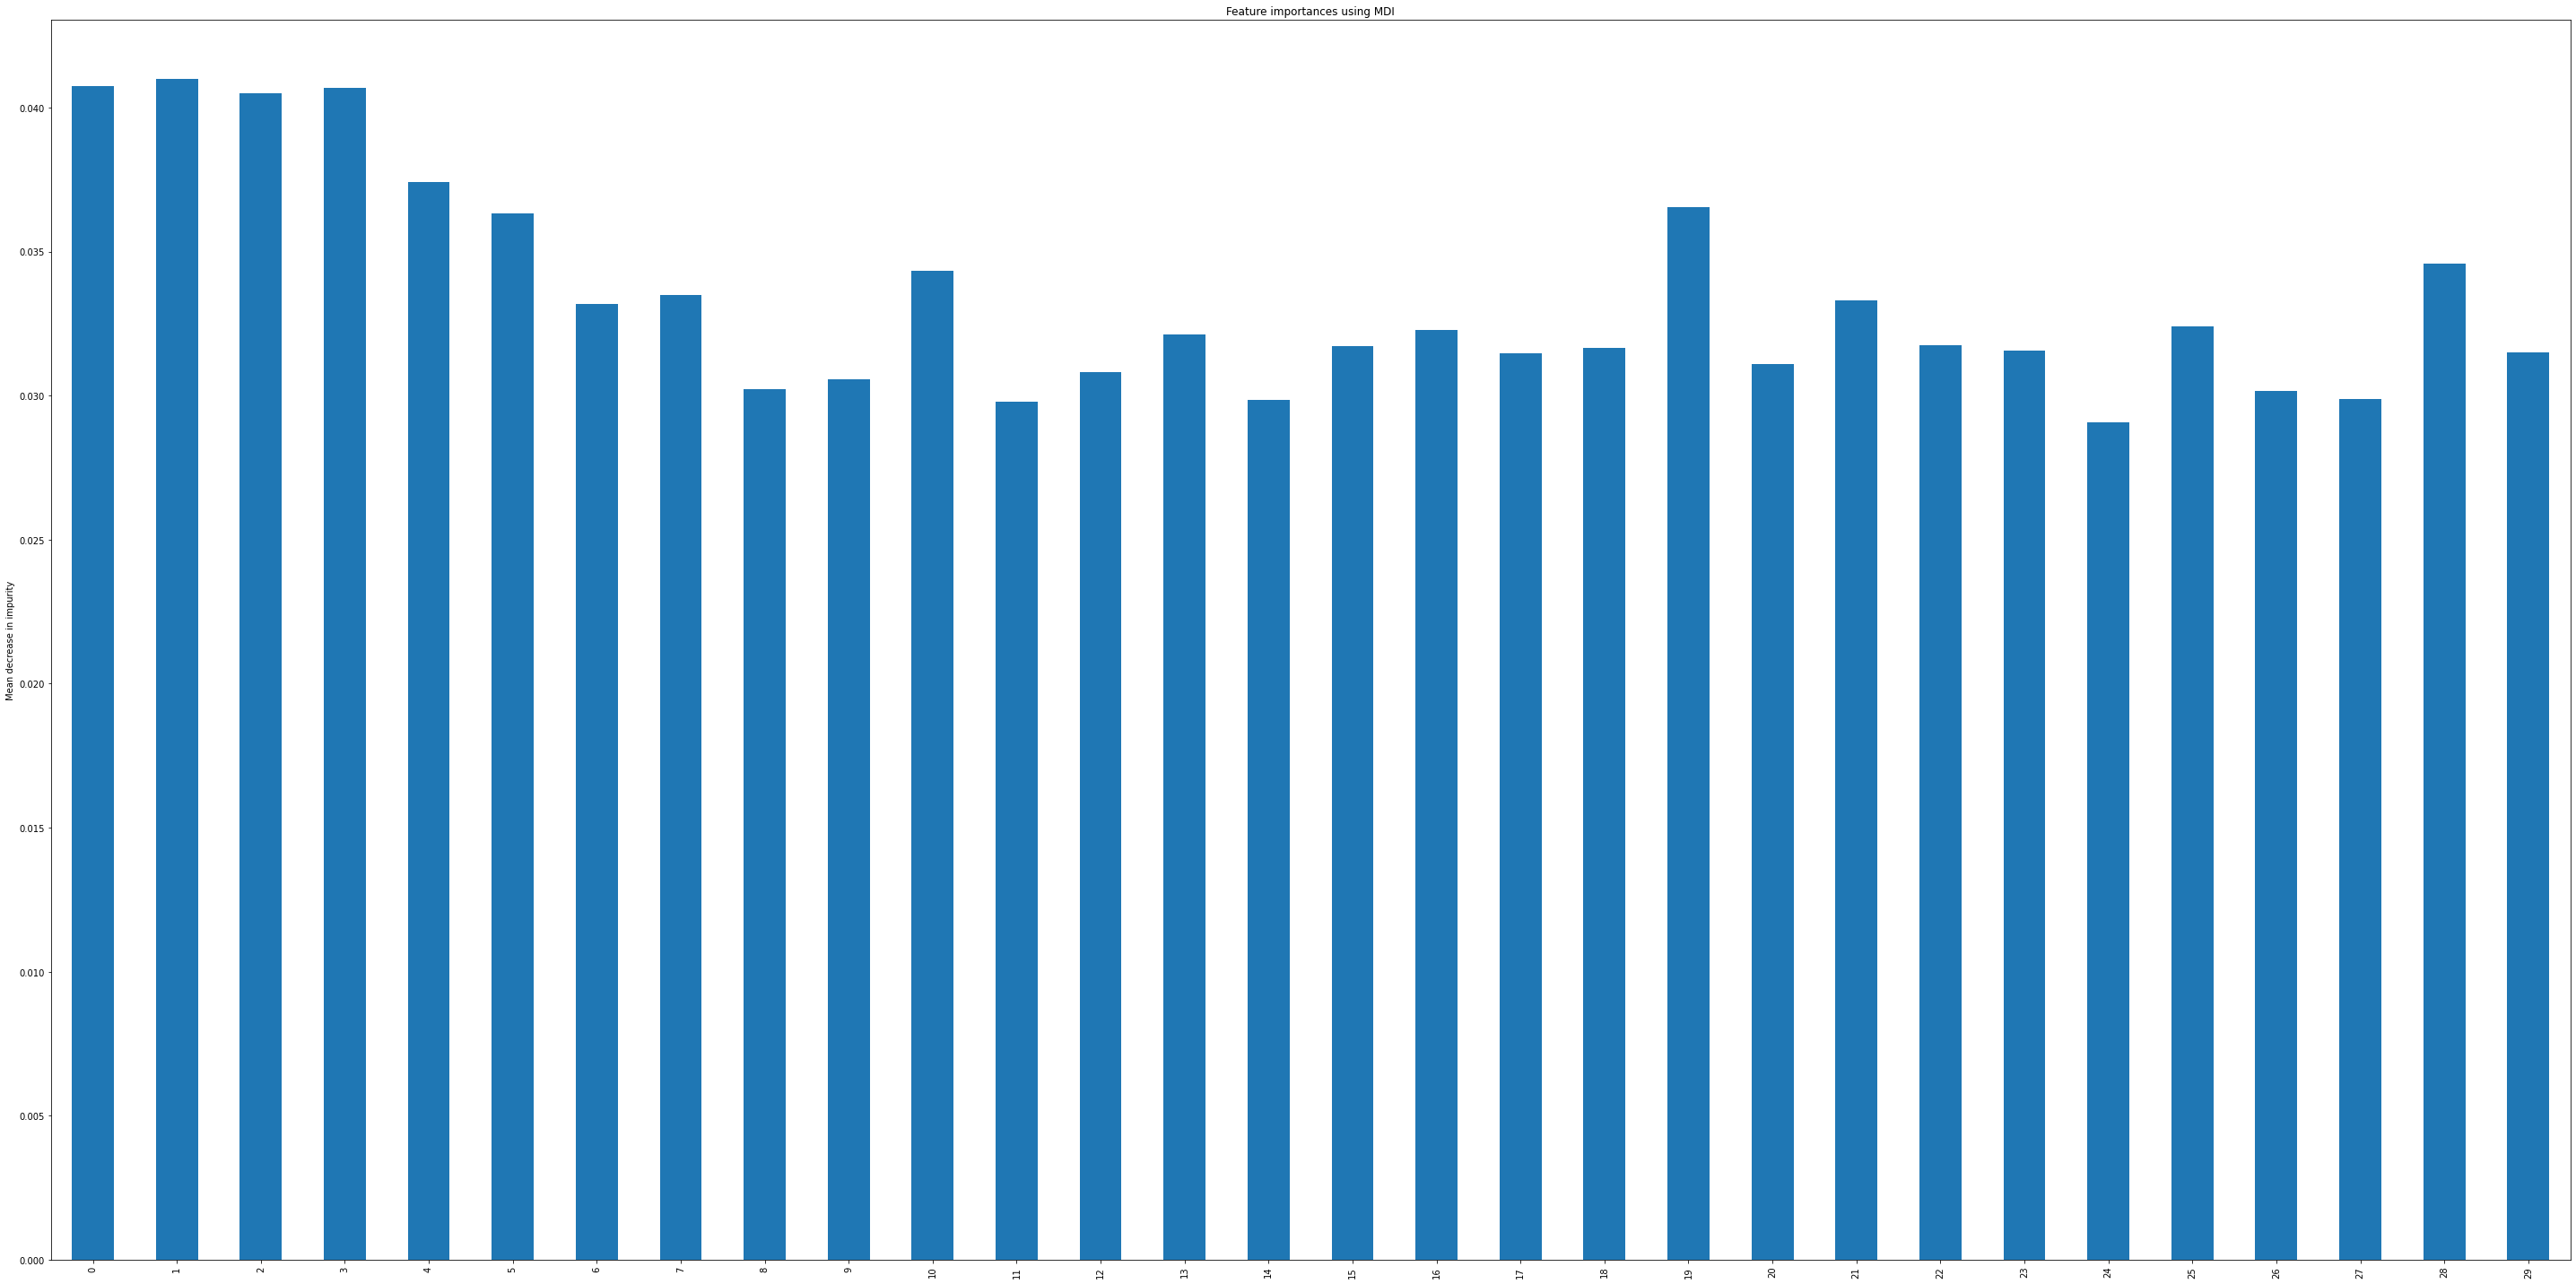

In [13]:
fig, ax = plt.subplots()
forest_importances.plot(kind='bar', figsize=(40,20))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Ahora se va a generar un box plot para cada columna para explorar los outliers

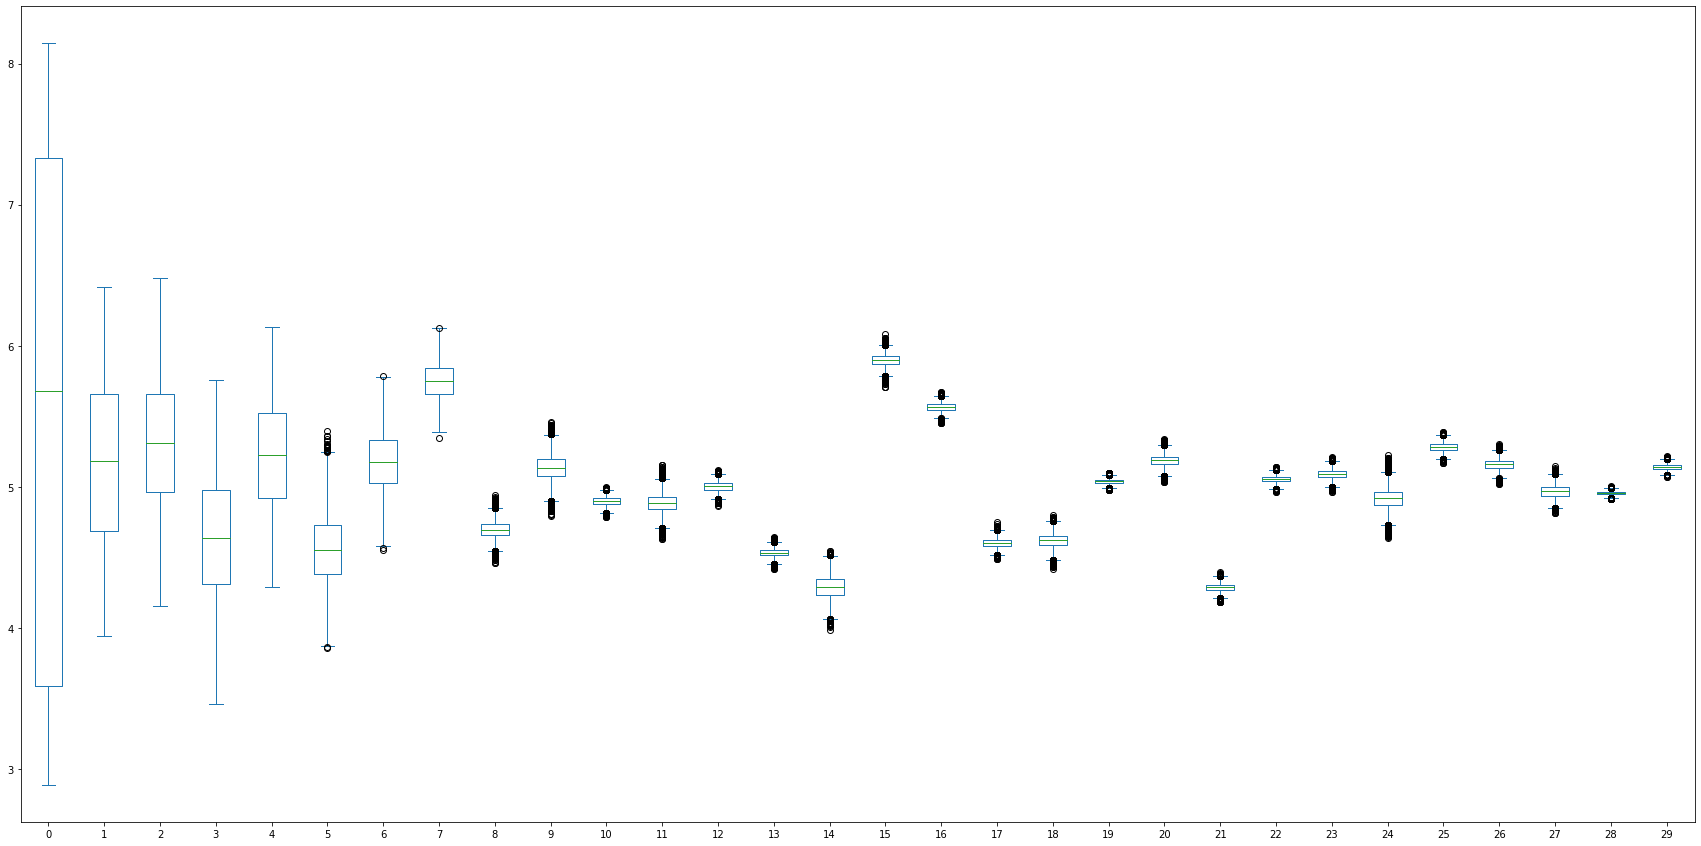

In [14]:
train[list(map(str, list(range(30))))].plot(kind='box', figsize = (30,15));

Para poder ver el test de Tukey de todas las columnas a la vez se va a calcular sobre el dataframe normalizado

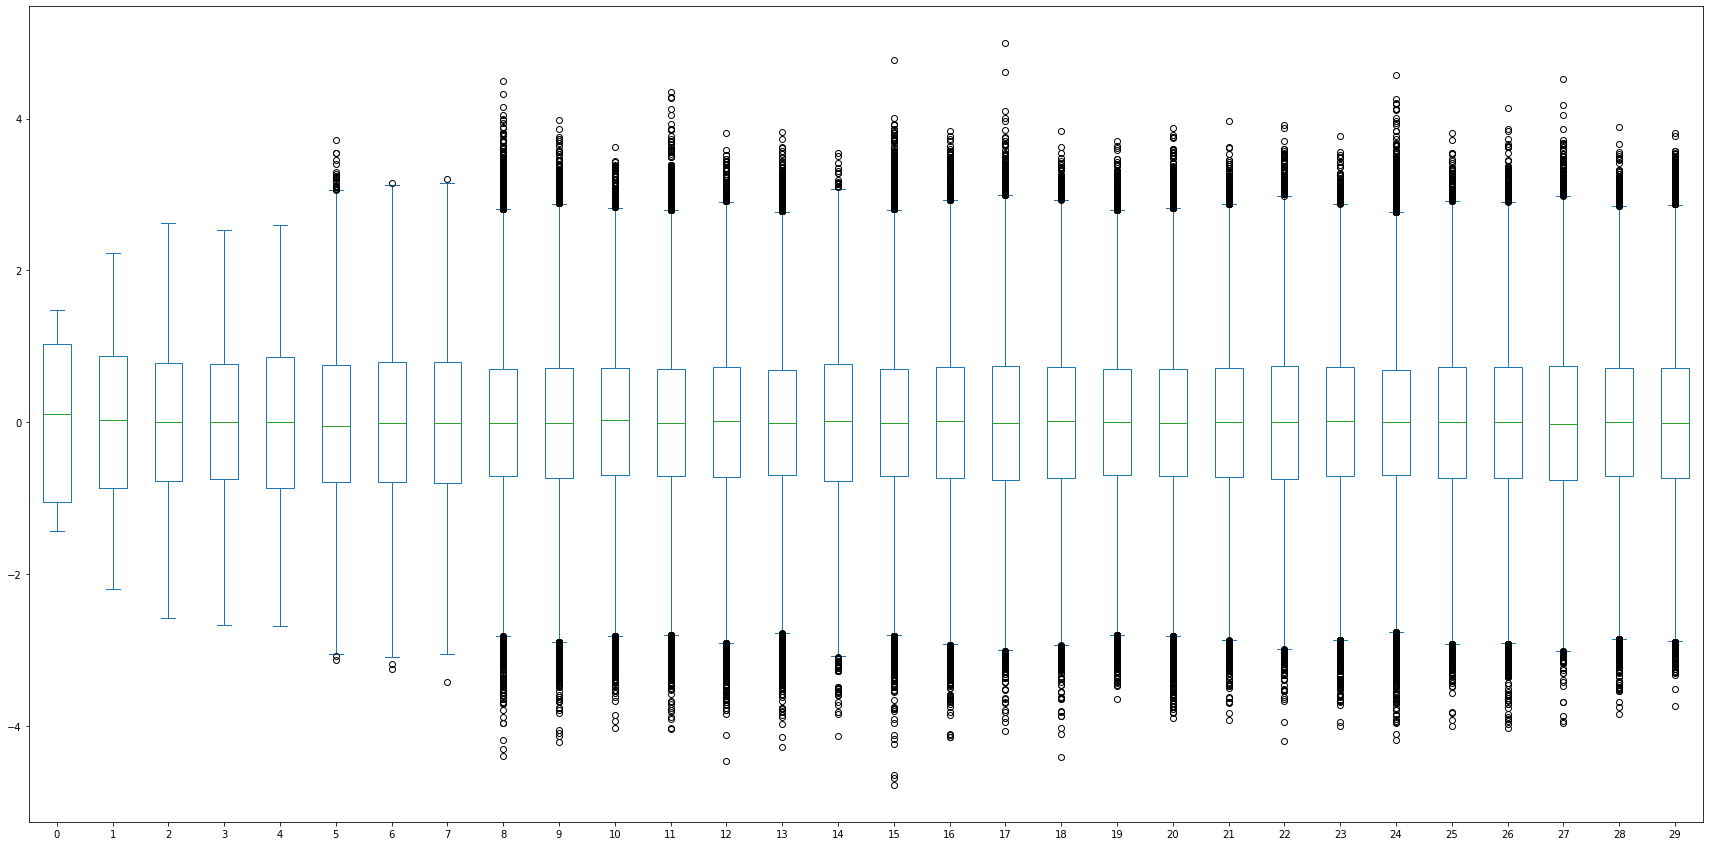

In [16]:
pd.DataFrame(StandardScaler().fit_transform(train.drop(columns=['target'])))[list(map(int, list(range(30))))].plot(kind='box', figsize = (30,15));

Así se generaría el dataframe habiendo quitado todas las líneas que contengan al menos un dato que se diferencie más de 3 desviaciones estandar de la media

In [18]:
from scipy.stats import zscore

train[(np.abs(zscore(train.drop(columns=['target']))) < 3).all(axis=1)].head()

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,6.758425,6.107760,5.583170,4.176225,5.025713,4.377642,5.048572,5.622564,4.814914,...,5.245275,4.276136,5.034873,5.070408,4.891534,5.258639,5.106243,5.020439,4.947837,5.160820
1,0,3.464307,4.591202,4.900424,5.123462,5.319878,4.732382,5.600980,5.952633,4.751034,...,5.270143,4.247860,5.039081,5.035914,4.931864,5.239359,5.106047,5.031158,4.939382,5.154362
2,0,7.130909,4.521430,5.154292,3.877377,5.322951,4.546459,4.810669,5.543257,4.693491,...,5.151262,4.291214,5.053493,5.124120,4.922390,5.295325,5.166308,4.941233,4.967573,5.133875
3,0,4.479191,4.374175,4.497788,4.459588,5.060301,4.576648,4.936561,5.622583,4.671111,...,5.158844,4.279381,5.046312,5.097704,4.962239,5.285526,5.162598,4.930491,4.956057,5.118482
4,0,3.396482,4.455330,5.417948,4.134214,4.988406,4.793623,5.395314,5.915441,4.633820,...,5.171591,4.303300,5.071706,5.093084,4.927096,5.282058,5.194416,4.937039,4.954645,5.133246


In [ ]:
train[(np.abs(zscore(train.drop(columns=['ID_code','target']))) < 3).all(axis=1)].shape[0]/train.shape[0]

0.97482